### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

sns.set()

# Principal Component Analysis

- Used for data reduction

### Data Reduction :
A process of reducing the higher dimension data to lower dimensional data to make the model less expensive is called data reduction.

### Loading Data

In [2]:
data = pd.read_csv(r'C:\Users\vamsi\Desktop\ML\Data Dimensionality\global_heat_index.csv')
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [4]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


In [5]:
## Hours where solar radiation is zero
clean1 = data[data['Hour']<6]
clean2 = data[data['Hour']>18]

In [6]:
clean1.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [7]:
clean2.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971374,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0


In [8]:
data = data.drop(clean1.index,axis=0)
data = data.drop(clean2.index,axis=0)

In [9]:
data.head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698
13,2011,1,1,13,2,22.256216,985.736511,27.274695,5.355347,1.747909,675
14,2011,1,1,14,2,21.725884,985.521545,27.819289,6.877182,2.005287,582
15,2011,1,1,15,2,20.507269,985.279663,30.023284,10.448921,2.206879,430


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 6 to 17514
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9490 non-null   int64  
 1   Month                  9490 non-null   int64  
 2   Day                    9490 non-null   int64  
 3   Hour                   9490 non-null   int64  
 4   Dew Point              9490 non-null   int64  
 5   Temperature            9490 non-null   float64
 6   Pressure               9490 non-null   float64
 7   Relative Humidity      9490 non-null   float64
 8   Wind Direction         9490 non-null   float64
 9   Wind Speed             9490 non-null   float64
 10  Solar Radiation (GHI)  9490 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 889.7 KB


### Preparing Input & Output Data

In [11]:
x = data.iloc[:,4:-1].values
y = data.iloc[:,-1].values

y = y.reshape(-1,1)

In [12]:
x

array([[  2.        ,   7.80670458, 986.2491455 ,  67.09318091,
         95.83598328,   1.81517458],
       [  2.        ,   9.03640845, 987.0389404 ,  64.03548307,
        105.1981812 ,   1.61531019],
       [  3.        ,  12.15828049, 987.8973999 ,  55.10565631,
        113.3176651 ,   1.43908835],
       ...,
       [ -7.        ,  19.96804137, 983.6603394 ,  14.98353993,
         17.50789642,   2.19113112],
       [ -5.        ,  16.70651682, 983.7686768 ,  21.56489121,
         29.40781403,   2.67560554],
       [ -6.        ,  15.60574869, 984.2324829 ,  21.98693678,
         42.64258194,   3.11116815]])

In [13]:
y

array([[  0],
       [  0],
       [159],
       ...,
       [221],
       [ 16],
       [  0]], dtype=int64)

### Normal Data Splitting

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)

In [16]:
x_train.shape

(7592, 6)

In [17]:
x_test.shape

(1898, 6)

In [18]:
y_train.shape

(7592, 1)

In [19]:
y_test.shape

(1898, 1)

# Data Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train) 
y_test = sc.fit_transform(y_test)

In [26]:
x_train

array([[-0.4622086 , -2.30959238,  1.3933099 ,  1.40099835, -1.17057734,
        -0.13907671],
       [-0.90833956, -0.69964181,  0.60101052, -0.74879668,  0.40631851,
        -1.31078602],
       [-0.90833956,  1.71430862,  0.29833368, -1.32256868,  0.3875315 ,
        -0.9441838 ],
       ...,
       [-0.10530383, -0.91009651,  0.25058371,  0.22080379,  1.1924681 ,
        -0.08707859],
       [-0.99756575, -1.39102554,  1.37545187, -0.51798326, -0.69821449,
        -0.89089311],
       [ 1.05463667,  0.12441259,  0.13585129,  0.87254538,  0.53363916,
         0.66472221]])

In [27]:
x_test

array([[-0.37011131, -1.78197702,  1.46445558,  0.66515794, -0.55934948,
        -0.50305701],
       [-0.28076111, -0.03855395,  1.00287058, -0.53749446,  0.91396893,
        -1.24380879],
       [-1.26361329, -0.93924761,  1.80011005, -0.88047845, -1.61773578,
        -0.99325889],
       ...,
       [ 0.43404048,  1.58219427, -1.45110669, -0.75912308,  0.50185532,
         1.55156442],
       [-0.6381619 , -1.34011988,  0.75599339, -0.14645746,  1.17936177,
         0.39498004],
       [-0.5488117 , -1.21934402,  1.30676773, -0.10557014, -1.72480063,
         0.23097835]])

In [28]:
y_train

array([[-1.41196753],
       [ 0.51324954],
       [ 1.48074441],
       ...,
       [-1.41196753],
       [-0.27833718],
       [ 1.40907812]])

In [29]:
y_test

array([[-1.36644546],
       [ 0.30801143],
       [ 0.819741  ],
       ...,
       [ 0.87156172],
       [-1.41178859],
       [-0.73488048]])

## KMeans with 6 clusters

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6,random_state=6)
kmeans.fit(x_train)

KMeans(n_clusters=6, random_state=6)

In [58]:
labels = kmeans.labels_
labels

array([2, 1, 3, ..., 1, 2, 5])

In [36]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

#This centers are 6 dimensional data points and hard to visualize it

array([[-0.60801895, -0.22127618,  0.85225293, -0.56823408, -1.34250729,
        -0.69263778],
       [ 0.18250912, -0.35825545,  0.64126739,  0.21683648,  0.66717723,
        -0.81008   ],
       [-0.66415572, -1.63689488,  1.1767672 ,  0.22999775, -1.10468362,
         0.00679604],
       [-1.07420969,  0.67410917,  0.04459391, -1.16999829,  0.83977727,
         0.02973621],
       [ 0.39304473,  1.0695264 , -1.08337045, -0.42446303,  0.51277763,
         1.50747744],
       [ 1.18052909,  0.07935586, -0.94079697,  1.26434797,  0.24453418,
        -0.08328627]])

# <font color="green"> PCA - Dimensional Reduction </font>

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(x_train)
pca

array([[ 2.19064007, -2.05179182],
       [ 1.45349458,  0.40871862],
       [ 0.27319543,  1.88450701],
       ...,
       [ 0.11267471, -0.20178389],
       [ 2.48089668, -0.17938248],
       [-1.03063561, -0.75206608]])

### VIsualization

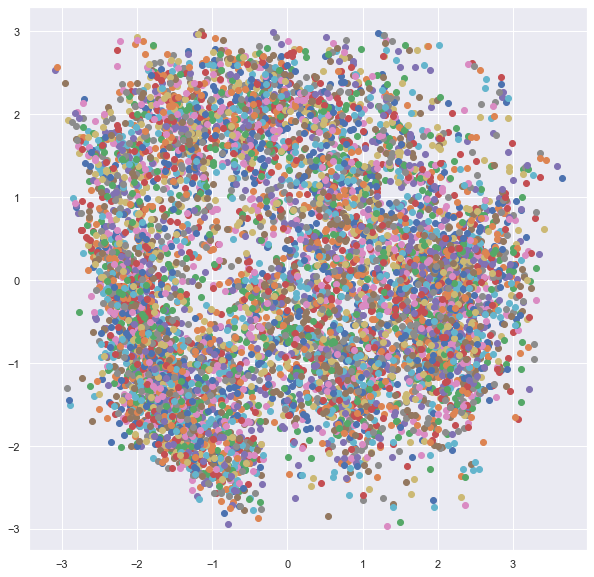

In [56]:
# PCA Visualization
plt.figure(figsize=(10,10))
for i in range(0,pca.shape[0]):
    plt.scatter(pca[i][0],pca[i][1])
plt.show()

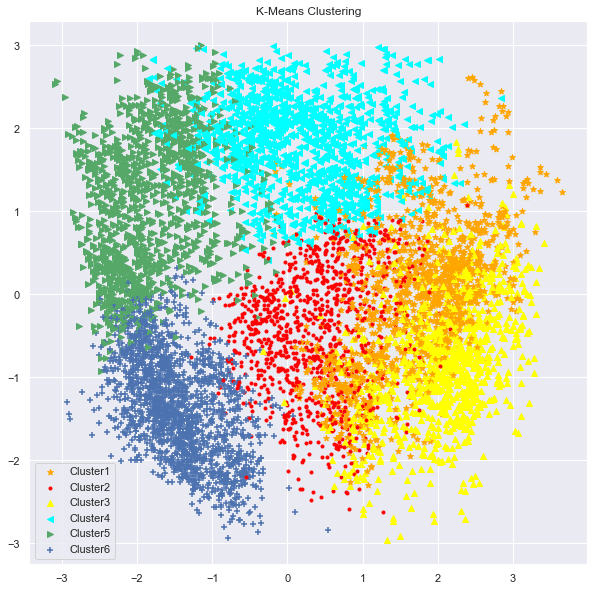

In [62]:
#Cluster wise PCA visualization
plt.figure(figsize=(10,10))
for i in range(0,pca.shape[0]):
    if labels[i]==0:
        c1 = plt.scatter(pca[i][0],pca[i][1],c='orange',marker='*')
    elif labels[i]==1:
        c2 = plt.scatter(pca[i][0],pca[i][1],c='red',marker='.')
    elif labels[i]==2:
        c3 = plt.scatter(pca[i][0],pca[i][1],c='yellow',marker='^')
    elif labels[i]==3:
        c4 = plt.scatter(pca[i][0],pca[i][1],c='cyan',marker='<')
    elif labels[i]==4:
        c5 = plt.scatter(pca[i][0],pca[i][1],c='g',marker='>')
    elif labels[i]==5:
        c6 = plt.scatter(pca[i][0],pca[i][1],c='b',marker='+')
        
plt.legend([c1,c2,c3,c4,c5,c6],['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6'])
plt.title('K-Means Clustering')
plt.show()